In [128]:
from zipfile import ZipFile

dataset = "/content/archive.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset extracted")


Dataset extracted


In [129]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [130]:
with_mask_path = "/content/data/with_mask"
without_mask_path = "/content/data/without_mask"

with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)


In [131]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

labels = with_mask_labels + without_mask_labels


In [132]:
data= []

for image_file in with_mask_files:

  image = Image.open(with_mask_path + "/" + image_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for image_file in without_mask_files:

  image = Image.open(without_mask_path + "/" + image_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [133]:
X = np.array(data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


In [134]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [135]:
import tensorflow as tf
from tensorflow import keras


In [136]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='sigmoid'))


In [137]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [138]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - acc: 0.6136 - loss: 0.7926 - val_acc: 0.8793 - val_loss: 0.2775
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.8743 - loss: 0.3414 - val_acc: 0.9107 - val_loss: 0.2207
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8979 - loss: 0.2626 - val_acc: 0.8992 - val_loss: 0.2232
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9173 - loss: 0.2190 - val_acc: 0.9124 - val_loss: 0.2123
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9147 - loss: 0.2202 - val_acc: 0.9306 - val_loss: 0.1714


In [139]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(loss)
print(accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9061 - loss: 0.2301
0.20712266862392426
0.9192587733268738


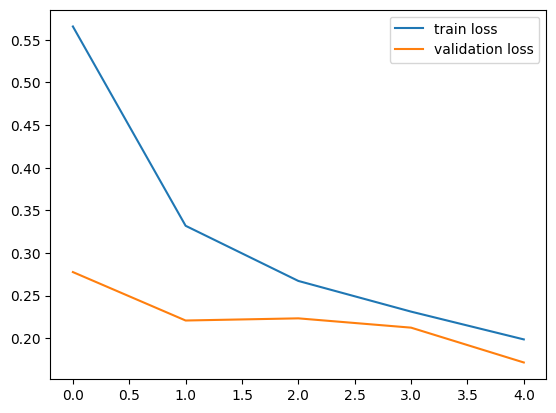

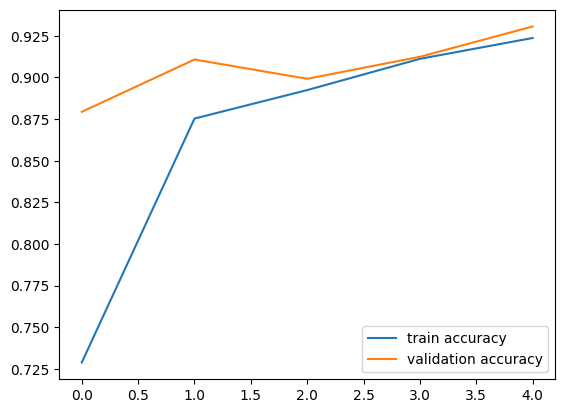

In [140]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


Enter the path of the image to be tested: /content/download.jpg


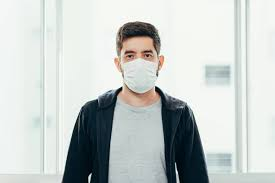

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.467056  0.5610831]]
The person in the image is wearing a mask


In [143]:
inupt_image_path = input("Enter the path of the image to be tested: ")

input_image = cv2.imread(inupt_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

prediction = model.predict(input_image_reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")


Enter the path of the image to be tested: /content/images.jpg


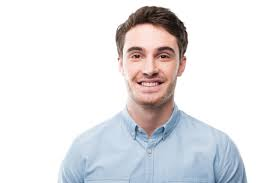

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.52342224 0.4701892 ]]
The person in the image is not wearing a mask


In [144]:
inupt_image_path = input("Enter the path of the image to be tested: ")

input_image = cv2.imread(inupt_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

prediction = model.predict(input_image_reshaped)

print(prediction)

input_pred_label = np.argmax(prediction)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")
